In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd


# Study data files
russia_alcohol = "Data/russia_alcohol.csv"
gdp_data = "Data/gdp.csv"
unemployment_data = "Data/russia-unemployment copy.csv"

# Read CSV
alc_df = pd.read_csv(russia_alcohol)
unemp_df = pd.read_csv(unemployment_data)
gdp_df_read = pd.read_csv(gdp_data)
unemp_df.head()


,date,Unemployment Rate (%),Annual Change,Unnamed: 3
0,1991-12-31,5.405,NaN,NaN
1,1992-12-31,5.180,-0.23,NaN
2,1993-12-31,5.880,0.70,NaN
3,1994-12-31,8.130,2.25,NaN
4,1995-12-31,9.450,1.32,NaN


In [24]:
# cleaning data
# renaming column and averaging months into year
# Study data files
clean_unemp = unemp_df.dropna(axis=1)
clean_unemp.columns=["Year","Unemployment Rate (%)"]

clean_unemp['Year']= pd.to_datetime(clean_unemp['Year']).dt.strftime('%Y')

# change null values to 0
clean_alc = alc_df.dropna()
# add in a total per region
clean_alc["Total"] = clean_alc["wine"] + clean_alc["beer"] + clean_alc["vodka"] + clean_alc["champagne"] + clean_alc["brandy"]
alc_year = clean_alc.groupby(clean_alc["year"]).sum()

#clean gdp data
gdp_df=gdp_df_read.dropna()
gdp_df.columns=["Date","GDP (in billions)"]
gdp_df
gdp_df["GDP (in billions)"]= gdp_df["GDP (in billions)"]/1000000000
gdp_df['Date']= pd.to_datetime(gdp_df['Date']).dt.strftime('%Y')
clean_unemp.head()

/var/folders/vl/20l4_0ts07bb1xtx5wc99wjm0000gn/T/ipykernel_23500/2681050642.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_unemp['Year']= pd.to_datetime(clean_unemp['Year']).dt.strftime('%Y')
/var/folders/vl/20l4_0ts07bb1xtx5wc99wjm0000gn/T/ipykernel_23500/2681050642.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_alc["Total"] = clean_alc["wine"] + clean_alc["beer"] + clean_alc["vodka"] + clean_alc["champagne"] + clean_alc["brandy"]


,Year,Unemployment Rate (%)
0,1991,5.405
1,1992,5.180
2,1993,5.880
3,1994,8.130
4,1995,9.450


<BarContainer object of 5 artists>

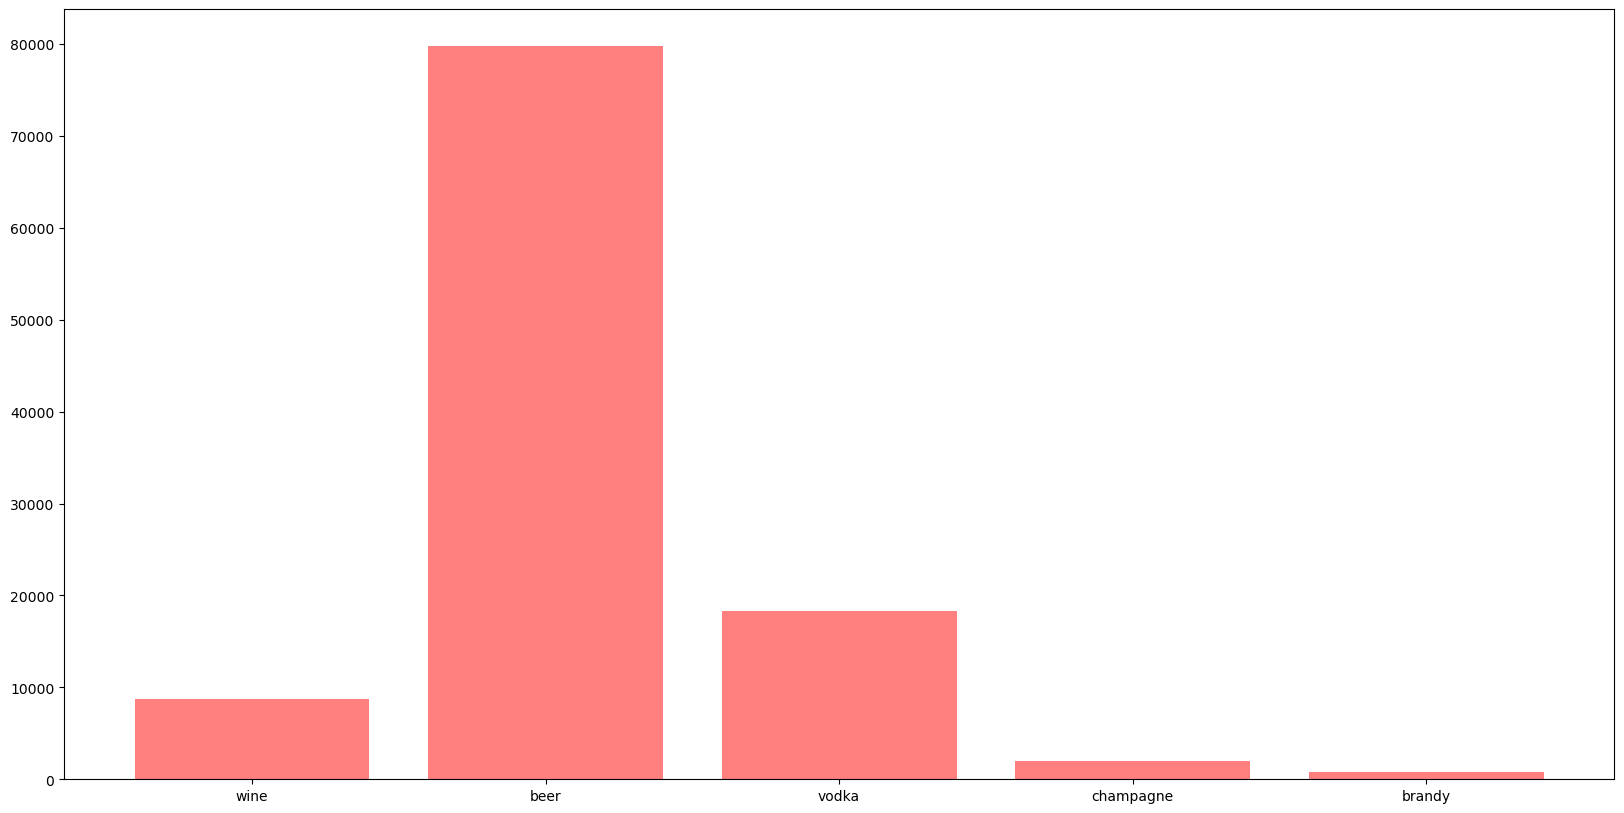

In [31]:
# What type of alcohol type is consumed most in Russia.
# plot a bar graph over the entirety of our data with total amount consumed/

tot_wine = clean_alc["wine"].sum()
tot_beer = clean_alc["beer"].sum()
tot_vodka = clean_alc["vodka"].sum()
tot_champ = clean_alc["champagne"].sum()
tot_brandy = clean_alc["brandy"].sum()

tot_alc_dict = {"Total Wine": [tot_wine], "Total Beer": [tot_beer], "Total Vodka": [tot_vodka], "Total Champagne": [tot_champ], "Total Brandy": [tot_brandy]}
tot_alc_df = pd.DataFrame(data=tot_alc_dict)

alc_list = ["wine", "beer", "vodka", "champagne", "brandy"]
plt.figure(figsize=(20,10))
plt.bar(alc_list, tot_alc_df.iloc[0,:], color='r', alpha=0.5, align="center")


<BarContainer object of 5 artists>

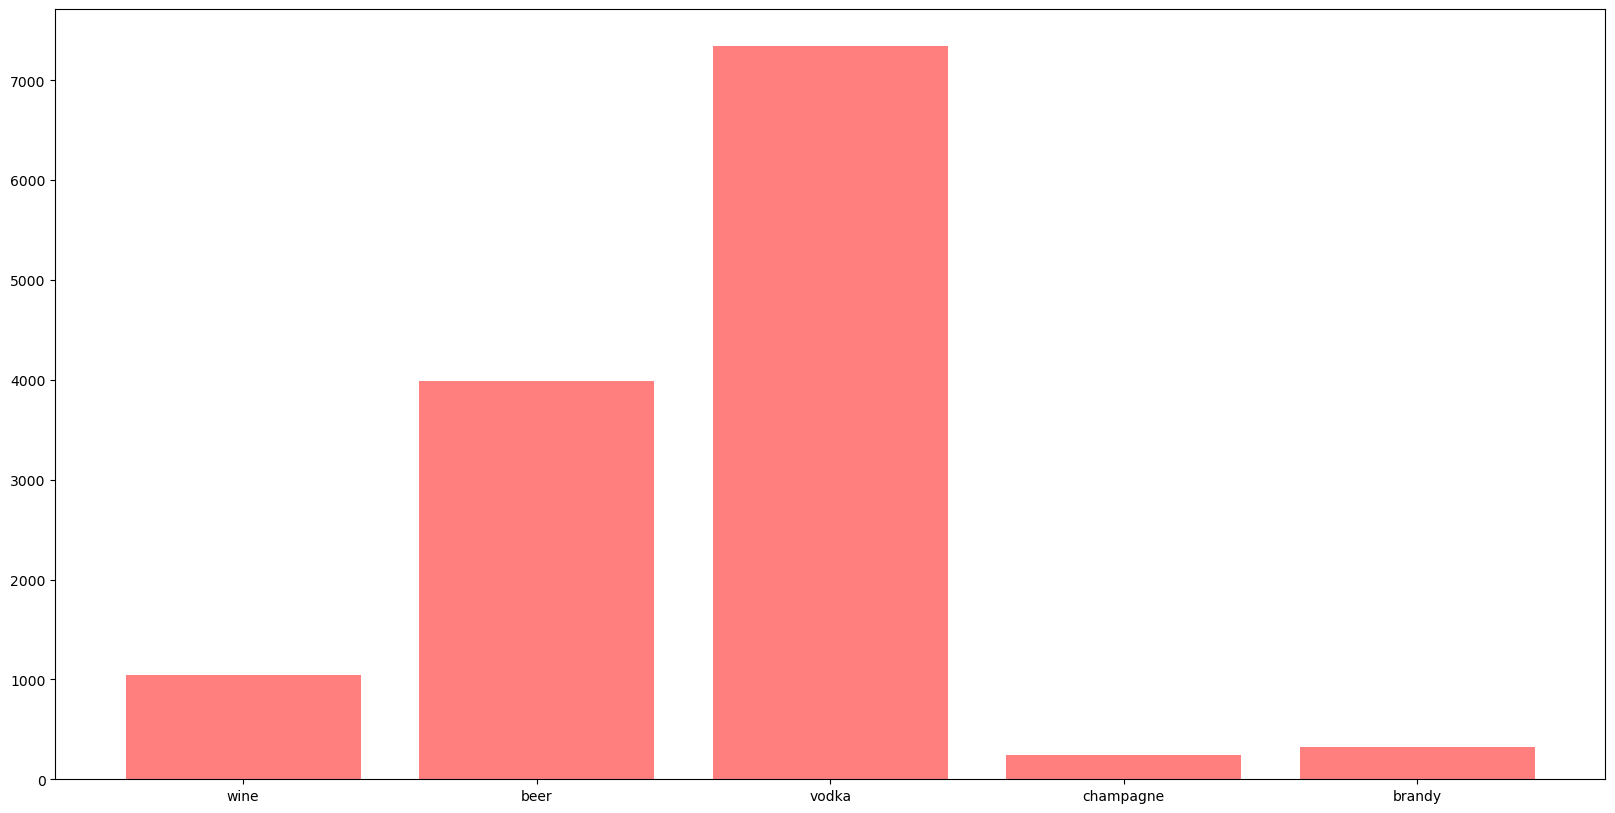

In [33]:
# plot a bar graph over the entirety of our data with total amount consumed by PERCENTAGE
# Used average alcohol percentage of each type of alcohol

tot_wine_ave = clean_alc["wine"].sum()*.12
tot_beer_ave = clean_alc["beer"].sum()*.05
tot_vodka_ave = clean_alc["vodka"].sum()*.40
tot_champ_ave = clean_alc["champagne"].sum()*.12
tot_brandy_ave = clean_alc["brandy"].sum()*.40

tot_alc_dict = {"Total Wine": [tot_wine_ave], "Total Beer": [tot_beer_ave], "Total Vodka": [tot_vodka_ave], "Total Champagne": [tot_champ_ave], "Total Brandy": [tot_brandy_ave]}
tot_alc_df = pd.DataFrame(data=tot_alc_dict)
#tot_alc_df.T

alc_list = ["wine", "beer", "vodka", "champagne", "brandy"]
plt.figure(figsize=(20,10))
plt.bar(alc_list, tot_alc_df.iloc[0,:], color='r', alpha=0.5, align="center")

In [ ]:
#  Does alcohol type consumed vary by region
#  Needs API to create a map

<Figure size 640x480 with 0 Axes>

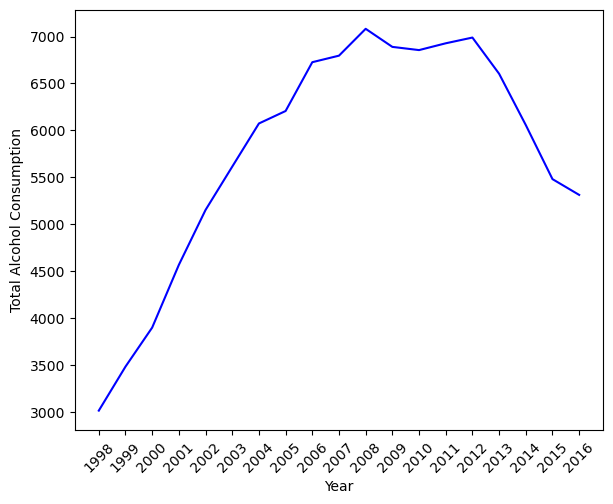

In [28]:
# How does alcohol consumption change with economic/unemployment conditions
alc_year.head()

fig = plt.figure()
fig = plt.figure(figsize=(15, 12))
x_axis=list(map(str,alc_year.index))
ax1 = fig.add_subplot(2, 2, 1)

ax1.plot(x_axis, alc_year["Total"], "b")
plt.xticks(rotation = 45)
plt.ylabel("Total Alcohol Consumption")
plt.xlabel("Year")
plt.show()

<Figure size 640x480 with 0 Axes>

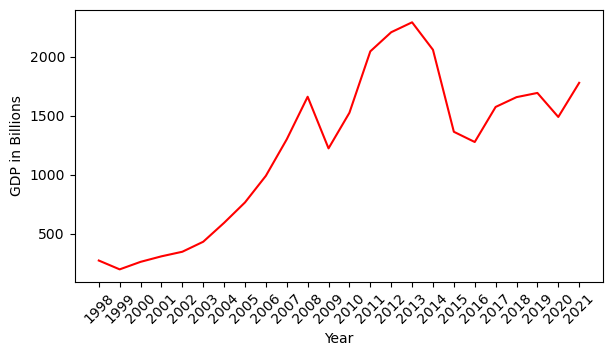

In [29]:
# Graphing GDP
fig = plt.figure()
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(3, 2, 1)
ax1.plot(gdp_df["Date"], gdp_df["GDP (in billions)"], "r")
plt.xticks(rotation = 45)
plt.ylabel("GDP in Billions")
plt.xlabel("Year")
plt.show()

/var/folders/vl/20l4_0ts07bb1xtx5wc99wjm0000gn/T/ipykernel_23500/1470291180.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_axis, rotation=45, fontsize='small')
/var/folders/vl/20l4_0ts07bb1xtx5wc99wjm0000gn/T/ipykernel_23500/1470291180.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x_axis, rotation=45, fontsize='small')
/var/folders/vl/20l4_0ts07bb1xtx5wc99wjm0000gn/T/ipykernel_23500/1470291180.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(x_axis, rotation=45, fontsize='small')
/var/folders/vl/20l4_0ts07bb1xtx5wc99wjm0000gn/T/ipykernel_23500/1470291180.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(x_axis, rotation=45, fontsize='small')
/var/folders/vl/20l4_0ts07bb1xtx5wc99wjm0000gn/T/ipykernel_23500/1470291180.py:46: UserWarning: FixedFormatter should only b

<Figure size 640x480 with 0 Axes>

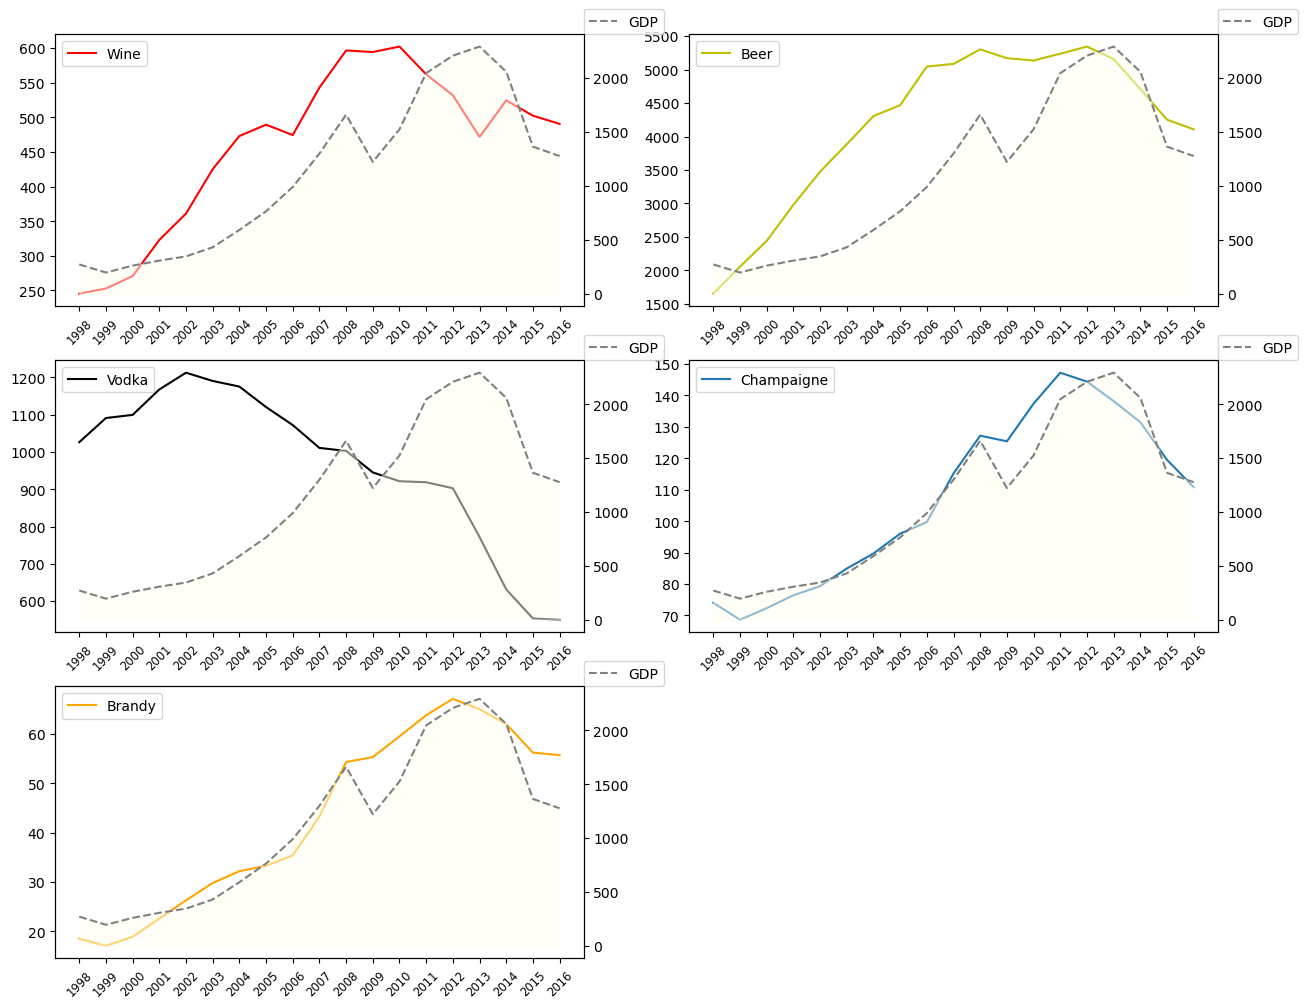

/var/folders/vl/20l4_0ts07bb1xtx5wc99wjm0000gn/T/ipykernel_23500/1470291180.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_axis, rotation=45, fontsize='small')
/var/folders/vl/20l4_0ts07bb1xtx5wc99wjm0000gn/T/ipykernel_23500/1470291180.py:75: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x_axis, rotation=45, fontsize='small')
/var/folders/vl/20l4_0ts07bb1xtx5wc99wjm0000gn/T/ipykernel_23500/1470291180.py:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(x_axis, rotation=45, fontsize='small')
/var/folders/vl/20l4_0ts07bb1xtx5wc99wjm0000gn/T/ipykernel_23500/1470291180.py:77: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(x_axis, rotation=45, fontsize='small')
/var/folders/vl/20l4_0ts07bb1xtx5wc99wjm0000gn/T/ipykernel_23500/1470291180.py:78: UserWarning: FixedFormatter should only b

Text(0, 0.5, 'Brandy')

<Figure size 640x480 with 0 Axes>

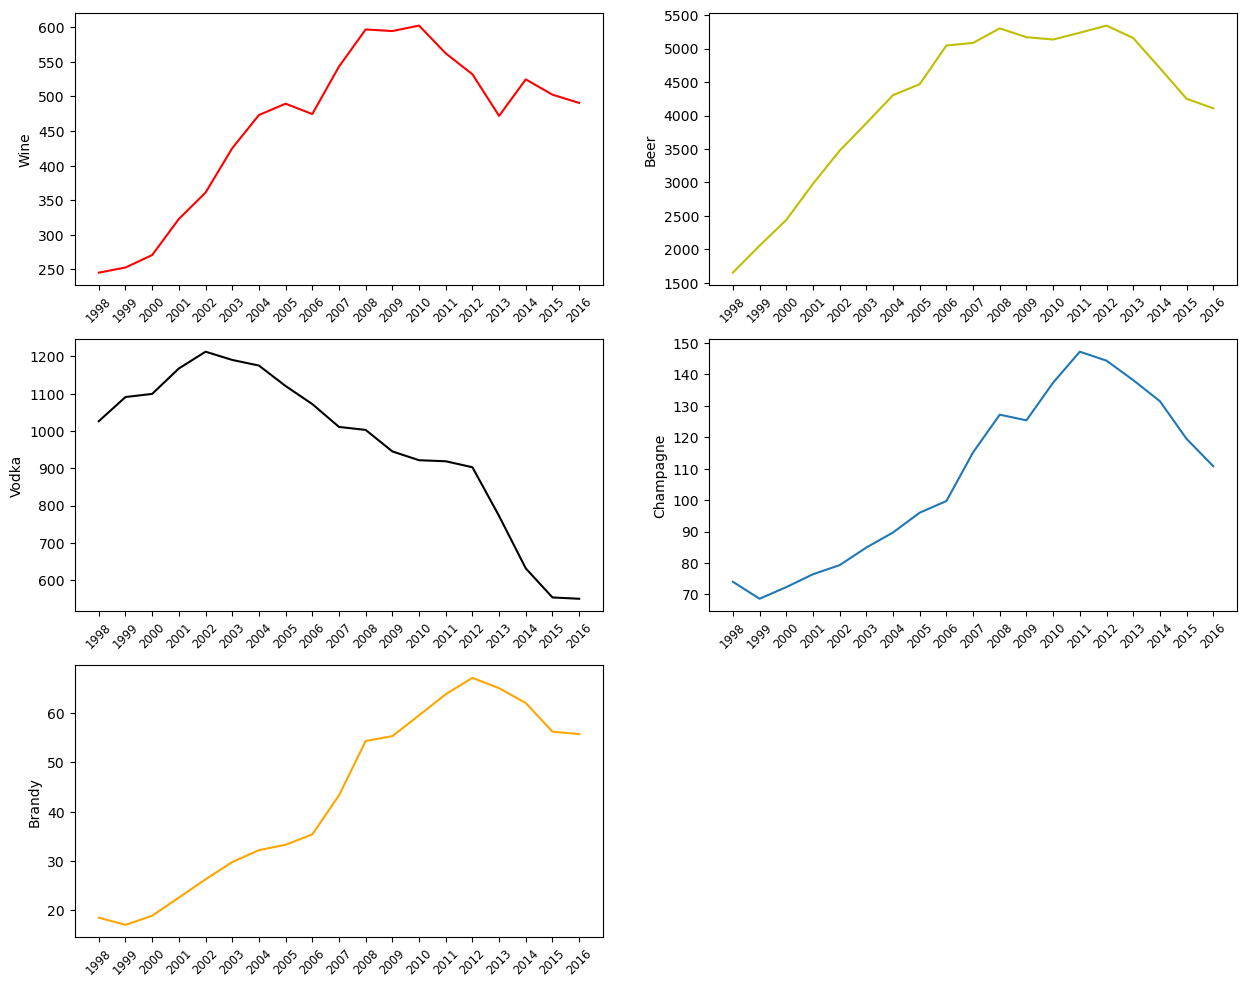

In [103]:
# How does Russia's alcohol consumption type change with economic/unemployment conditions
# Plotting alcohol by year

year_group=clean_alc.groupby(clean_alc["year"]).sum()
gdp_clean_df=gdp_df[gdp_df["Date"].astype(int)<=2016]

x_axis=list(map(str,year_group.index))

fig = plt.figure()
fig = plt.figure(figsize=(15, 12))

ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)
ax1.plot(x_axis, year_group['wine'], 'r',label="Wine") #row 0, col 0 
ax1.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax1.legend(loc="upper left") #or upper right
ax1 = ax1.twinx()
ax1.plot(x_axis, gdp_clean_df['GDP (in billions)'], 'gray', linestyle='--',label="GDP")
ax1.fill_between(x_axis[0:], gdp_clean_df['GDP (in billions)'][0:], alpha=0.5, color='ivory')
ax1.legend(loc=(1.0, 1.0))
ax2.plot(x_axis, year_group['beer'],'y',label="Beer")
ax2.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax2.legend(loc="upper left")
ax2 = ax2.twinx()
ax2.plot(x_axis, gdp_clean_df['GDP (in billions)'], 'gray', linestyle='--',label="GDP")
ax2.fill_between(x_axis[0:], gdp_clean_df['GDP (in billions)'][0:], alpha=0.5, color='ivory')
ax2.legend(loc=(1.0, 1.0))
ax3.plot(x_axis, year_group['vodka'],'black',label="Vodka")
ax3.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax3.legend(loc="upper left")
ax3 = ax3.twinx()
ax3.plot(x_axis, gdp_clean_df['GDP (in billions)'], 'gray', linestyle='--',label="GDP")
ax3.fill_between(x_axis[0:], gdp_clean_df['GDP (in billions)'][0:], alpha=0.5, color='ivory')
ax3.legend(loc=(1.0, 1.0))
ax4.plot(x_axis, year_group['champagne'],label="Champaigne")
ax4.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax4.legend(loc="upper left")
ax4 = ax4.twinx()
ax4.plot(x_axis, gdp_clean_df['GDP (in billions)'], 'gray', linestyle='--',label="GDP")
ax4.fill_between(x_axis[0:], gdp_clean_df['GDP (in billions)'][0:], alpha=0.5, color='ivory')
ax4.legend(loc=(1.0, 1.0))
ax5.plot(x_axis, year_group['brandy'],'orange',label="Brandy")
ax5.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax5.legend(loc="upper left")
ax5 = ax5.twinx()
ax5.plot(x_axis, gdp_clean_df['GDP (in billions)'], 'gray', linestyle='--',label="GDP")
ax5.fill_between(x_axis[0:], gdp_clean_df['GDP (in billions)'][0:], alpha=0.5, color='ivory')
ax5.legend(loc=(1.0, 1.0))

plt.show();
 





fig = plt.figure()
fig = plt.figure(figsize=(15, 12))

ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)
ax1.plot(x_axis, year_group['wine'], 'r') #row 0, col 0 )
ax2.plot(x_axis, year_group['beer'],'y')

ax3.plot(x_axis, year_group['vodka'],'black')
ax4.plot(x_axis, year_group['champagne'])
ax5.plot(x_axis, year_group['brandy'],'orange')
ax1.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax2.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax3.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax4.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax5.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax1.set_ylabel('Wine') 
ax2.set_ylabel('Beer') 
ax3.set_ylabel('Vodka') 
ax4.set_ylabel('Champagne') 
ax5.set_ylabel('Brandy') 
ax1.set_ylabel('Wine') 
ax2.set_ylabel('Beer') 
ax3.set_ylabel('Vodka') 
ax4.set_ylabel('Champagne') 
ax5.set_ylabel('Brandy') 




In [ ]:
# Does region population impact alcohol consumption per capita
# API

In [ ]:
# Can we predict alcohol consumption based on unemployment rate in the future

In [ ]:
# ***** does temperature affect alcohol consumption